# Introduction to Machine Learning: Final Project
<div style="text-align: right;">0816066 官澔恩</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Data Input

In [2]:
data = pd.read_csv('neo.csv')
display(data)

data_n = data[data['hazard'] == 0]
data_p = data[data['hazard'] == 1]

,id,name,abs_mag,est_dia_min,est_dia_max,epoch,min_orb_inter,jup_tisser,e,a,i,asc_node_long,peri_arg,orb_period,peri_dist,ap_dist,mean_ano,mean_mot,hazard
0,2000433,433 Eros (A898 PA),10.43,21.804944,48.757337,2459600.5,0.149124,4.582,0.222727,1.458273,10.828461,304.296353,178.897162,643.215830,1.133476,1.783070,246.904124,0.559688,0
1,2000719,719 Albert (A911 TB),15.51,2.101624,4.699374,2459600.5,0.202582,3.141,0.546959,2.637505,11.575270,183.855259,156.227577,1564.546414,1.194899,4.080112,278.197186,0.230099,0
2,2000887,887 Alinda (A918 AA),13.87,4.472548,10.000921,2459600.5,0.081532,3.221,0.570486,2.473158,9.394143,110.428801,350.493242,1420.614469,1.062256,3.884060,86.607210,0.253411,0
3,2001036,1036 Ganymed (A924 UB),9.25,37.545248,83.953727,2459600.5,0.345327,3.034,0.533122,2.665849,26.677903,215.517209,132.428100,1589.834205,1.244627,4.087071,140.654842,0.226439,0
4,2001221,1221 Amor (1932 EA1),17.39,0.884209,1.977152,2459600.5,0.106445,3.782,0.435843,1.918731,11.883263,171.320253,26.643921,970.777342,1.082467,2.754996,261.044506,0.370837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,3703253,(2014 YJ42),20.50,0.211132,0.472106,2459600.5,0.115968,3.362,0.696713,2.121608,7.042962,357.073913,185.855539,1128.745468,0.643457,3.599759,85.260075,0.318938,0
11989,3703254,(2014 YK42),24.80,0.029144,0.065169,2457022.5,0.036414,3.919,0.479626,1.774917,15.525759,280.690972,132.052015,863.705160,0.923621,2.626213,15.564948,0.416809,0
11990,3703255,(2014 YL42),24.60,0.031956,0.071456,2459600.5,0.003338,3.507,0.673712,2.009047,3.261857,279.211299,96.518680,1040.120614,0.655528,3.362567,188.864627,0.346114,0
11991,3703261,(2014 YQ42),22.90,0.069913,0.156329,2459600.5,0.204584,4.616,0.190243,1.451009,6.805552,302.017877,140.104952,638.416058,1.174965,1.727054,24.241079,0.563896,0


## Data Visualization
用來顯示潛在威脅天體與非潛在威脅天體比例關係的函式，以及用來顯示兩者在某個特徵下分佈情形的函式。

In [3]:
def show_percentage(data_in, title):
    labels, counts = np.unique(data_in['hazard'], return_counts=True)
    labels = list(map(lambda x: 'hazardous' if x else 'non-hazardous', labels))
    plt.pie(counts, labels=labels, autopct='%.1f%%', colors=['#77b359', '#ffca9b'],
        textprops={'fontsize': 14})
    plt.title(title, fontsize=16)
    plt.show()
    
def show_distribution(feature, title):
    plt.figure(figsize=(5, 6))
    plt.boxplot([data_n[feature], data_p[feature]],
        labels=['non-hazardous', 'hazardous'])
    plt.xticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()

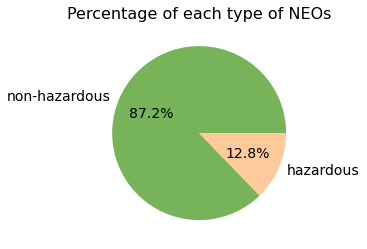

In [4]:
show_percentage(data, 'Percentage of each type of NEOs')

絕大多數的近地天體是沒有潛在威脅的，不過這也代表資料的分佈不平均，因此在資料前處理時需要將讓它們的比例可以接近 $1:1$。

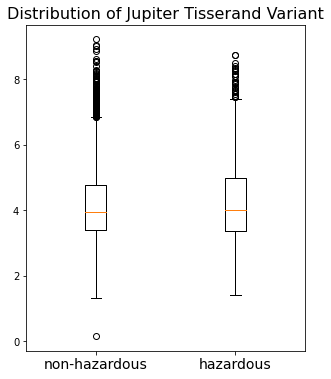

In [5]:
show_distribution('jup_tisser', 'Distribution of Jupiter Tisserand Variant')

不管有沒有潛在危險性，蒂塞朗參數在兩者的分佈上幾乎沒有差異

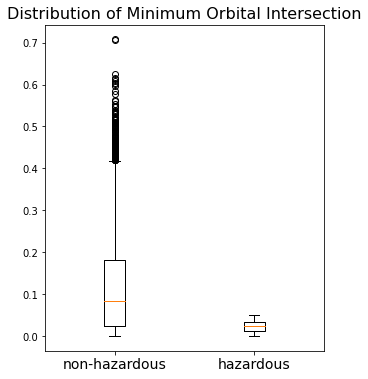

In [6]:
show_distribution('min_orb_inter', 'Distribution of Minimum Orbital Intersection')

由於潛在威脅天體的定義和最小軌道相交距離有關，在分佈上也可以看到明顯差異

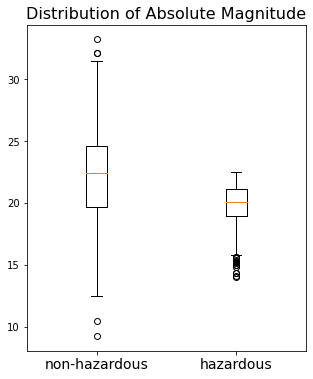

In [7]:
show_distribution('abs_mag', 'Distribution of Absolute Magnitude')

絕對星等也會和潛在威脅天體的定義有關，因此分佈上也能稍微看出差異


總共 11993 個近地天體，
其中 1533 個滿足潛在威脅天體的定義，
10460 個不滿足。


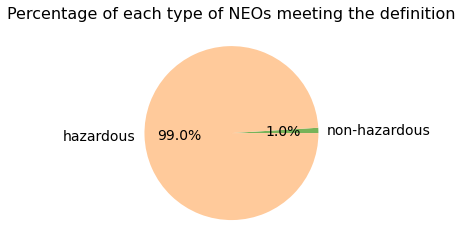

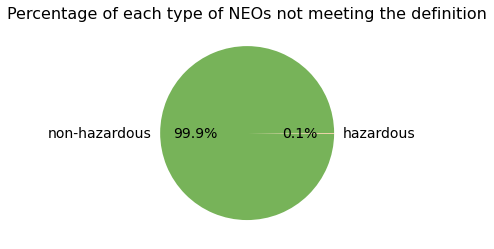

In [8]:
filter_moi = (data['min_orb_inter'] < 0.05).tolist()
filter_am = (data['abs_mag'] <= 22).tolist()
filter_and = np.logical_and(filter_moi, filter_am)
counts = np.unique(filter_and, return_counts=True)[1]
total = counts.sum()

display(Markdown(f'''
總共 { total } 個近地天體，
其中 { counts[1] } 個滿足潛在威脅天體的定義，
{ counts[0] } 個不滿足。
'''))

# Meeting NEOs
show_percentage(data[filter_and],
    'Percentage of each type of NEOs meeting the definition')

# Non-meeting NEOs
show_percentage(data[np.logical_not(filter_and)],
    'Percentage of each type of NEOs not meeting the definition')

可以看到有天體雖然滿足定義但是卻並非潛在威脅天體，也有天體不滿足定義卻是潛在威脅天體。

不過不滿足定義的比例實在是太低了，如果我直接使用定義去判斷的話，輕輕鬆鬆就可以達到 $99\%$ 以上的準確率，因此我需要在訓練時將這兩個資訊移除。

## Data Preprocessing
先將原本的資料最後面的 $30\%$ 分出來作為最後評估表現之用。接著我使用 SMOTE 來增加潛在威脅天體的數量，使得讓兩種類別的資料平衡。

In [9]:
features = data.drop(columns=['id', 'name', 'abs_mag', 'min_orb_inter', 'hazard']) \
               .to_numpy()
labels = data['hazard'].to_numpy()
        
X_train, X_test, y_train, y_test = \
    train_test_split(features, labels, test_size=0.3, shuffle=False)

X_train, y_train = shuffle(X_train, y_train)

sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)

接著要讓每種 feature 的權重一致，因此我將資料標準化

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models
我分別使用 random forest、SVM 和 logistic regression 來嘗試做分類。

In [11]:
def getModel(model_type, params):
    if model_type == 'RFC':
        return RandomForestClassifier(criterion='gini', **params)
    elif model_type == 'SVC':
        return SVC(kernel='rbf', **params)
    elif model_type == 'LRC':
        return LogisticRegression(solver='liblinear', **params)
    else:
        return None

## Validation & Results
我針對每個模型去做 5-fold cross validation，再用原先預留的那三成資料去驗證模型的好壞。

此為用來展示 confusion matrix、accuracy、positive precision 和 positive recall 的函式

In [12]:
def show_performance(y_true, y_pred):
    c_matrix = confusion_matrix(y_true, y_pred)
    c_table = pd.DataFrame(c_matrix)
    c_table.columns.name = 'truth\pred'
    display(c_table)
    
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    p_table = pd.DataFrame({ 'value': [acc, pre, rec] }, index=['Accuracy', 'Precision', 'Recall'])
    display(p_table)
    
    return acc

此為用來執行 5-fold cross validation 的函式，會回傳每個 fold 的 models 共同得出的 prediction 以用來計算平均表現。也會回傳 5 個 fold 中準確率最高的那個 model。

In [13]:
def cross_validate(model, X, y):
    best_acc = 0
    best_model = None
    kf = KFold(5)
    y_preds = np.array([])
    
    for train_idx, val_idx in kf.split(X):
        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_preds = np.append(y_preds, y_pred)
        
        acc = accuracy_score(y_val, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_model = model
    
    return y_preds, best_model

用來執行 grid search 去訓練模型的函式，針對每種參數組合去執行 5-fold cross validation，並且會回傳能獲得準確率最高的參數組合所訓練出的模型，以及所有參數組合下得到的準確率。

In [14]:
def train_model(model_type, param_grid, X_train, y_train):
    best_param_model = None
    best_param = None
    best_acc = 0
    acc_history = []
    
    for params in param_grid:
        display(Markdown(str(params)))
        model = getModel(model_type, params)
        y_pred, best_model = cross_validate(model, X_train, y_train)
        acc = show_performance(y_train, y_pred)
        acc_history.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_param_model = best_model
            best_param = params
            
    display(Markdown(f'Best Param: { best_param }'))
    
    return best_param_model, acc_history

用來將 grid search 跑出來各種組合的準確率畫成熱值圖的函式

In [15]:
def show_acc_grid(acc_grid, figsize, xlabel, ylabel, xticklabels, yticklabels):
    plt.figure(figsize=figsize)
    sns.heatmap(acc_grid, annot=True, fmt='.3f', 
                xticklabels=xticklabels, yticklabels=yticklabels)
    plt.title('Validation Accuracy Grid')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

> 註：以下輸出中的 training performance 為 5-fold cross validation 的 average performance

### Random Forest

#### Training Performance

{'max_depth': 20.0, 'min_samples_leaf': 1}

truth\pred,0,1
0,5839,1254
1,162,6931


,value
Accuracy,0.900183
Precision,0.846793
Recall,0.977161


{'max_depth': 20.0, 'min_samples_leaf': 2}

truth\pred,0,1
0,5812,1281
1,169,6924


,value
Accuracy,0.897787
Precision,0.843876
Recall,0.976174


{'max_depth': 20.0, 'min_samples_leaf': 4}

truth\pred,0,1
0,5753,1340
1,185,6908


,value
Accuracy,0.892500
Precision,0.837536
Recall,0.973918


{'max_depth': 20.0, 'min_samples_leaf': 8}

truth\pred,0,1
0,5638,1455
1,221,6872


,value
Accuracy,0.881855
Precision,0.825267
Recall,0.968843


{'max_depth': 20.0, 'min_samples_leaf': 16}

truth\pred,0,1
0,5542,1551
1,233,6860


,value
Accuracy,0.874242
Precision,0.815599
Recall,0.967151


{'max_depth': 25.0, 'min_samples_leaf': 1}

truth\pred,0,1
0,5889,1204
1,177,6916


,value
Accuracy,0.902651
Precision,0.851724
Recall,0.975046


{'max_depth': 25.0, 'min_samples_leaf': 2}

truth\pred,0,1
0,5856,1237
1,191,6902


,value
Accuracy,0.899337
Precision,0.848016
Recall,0.973072


{'max_depth': 25.0, 'min_samples_leaf': 4}

truth\pred,0,1
0,5770,1323
1,187,6906


,value
Accuracy,0.893557
Precision,0.839227
Recall,0.973636


{'max_depth': 25.0, 'min_samples_leaf': 8}

truth\pred,0,1
0,5658,1435
1,208,6885


,value
Accuracy,0.884182
Precision,0.827524
Recall,0.970675


{'max_depth': 25.0, 'min_samples_leaf': 16}

truth\pred,0,1
0,5521,1572
1,244,6849


,value
Accuracy,0.871986
Precision,0.813324
Recall,0.965600


{'max_depth': 30.0, 'min_samples_leaf': 1}

truth\pred,0,1
0,5942,1151
1,187,6906


,value
Accuracy,0.905682
Precision,0.857143
Recall,0.973636


{'max_depth': 30.0, 'min_samples_leaf': 2}

truth\pred,0,1
0,5869,1224
1,185,6908


,value
Accuracy,0.900677
Precision,0.849484
Recall,0.973918


{'max_depth': 30.0, 'min_samples_leaf': 4}

truth\pred,0,1
0,5761,1332
1,205,6888


,value
Accuracy,0.891654
Precision,0.837956
Recall,0.971098


{'max_depth': 30.0, 'min_samples_leaf': 8}

truth\pred,0,1
0,5656,1437
1,232,6861


,value
Accuracy,0.882349
Precision,0.826826
Recall,0.967292


{'max_depth': 30.0, 'min_samples_leaf': 16}

truth\pred,0,1
0,5527,1566
1,246,6847


,value
Accuracy,0.872268
Precision,0.813860
Recall,0.965318


{'max_depth': 35.0, 'min_samples_leaf': 1}

truth\pred,0,1
0,5922,1171
1,194,6899


,value
Accuracy,0.903778
Precision,0.854895
Recall,0.972649


{'max_depth': 35.0, 'min_samples_leaf': 2}

truth\pred,0,1
0,5854,1239
1,191,6902


,value
Accuracy,0.899196
Precision,0.847807
Recall,0.973072


{'max_depth': 35.0, 'min_samples_leaf': 4}

truth\pred,0,1
0,5779,1314
1,197,6896


,value
Accuracy,0.893487
Precision,0.839951
Recall,0.972226


{'max_depth': 35.0, 'min_samples_leaf': 8}

truth\pred,0,1
0,5652,1441
1,210,6883


,value
Accuracy,0.883618
Precision,0.826886
Recall,0.970393


{'max_depth': 35.0, 'min_samples_leaf': 16}

truth\pred,0,1
0,5514,1579
1,263,6830


,value
Accuracy,0.870154
Precision,0.812225
Recall,0.962921


{'max_depth': 40.0, 'min_samples_leaf': 1}

truth\pred,0,1
0,5924,1169
1,191,6902


,value
Accuracy,0.904131
Precision,0.855160
Recall,0.973072


{'max_depth': 40.0, 'min_samples_leaf': 2}

truth\pred,0,1
0,5857,1236
1,195,6898


,value
Accuracy,0.899126
Precision,0.848045
Recall,0.972508


{'max_depth': 40.0, 'min_samples_leaf': 4}

truth\pred,0,1
0,5779,1314
1,214,6879


,value
Accuracy,0.892288
Precision,0.839619
Recall,0.969829


{'max_depth': 40.0, 'min_samples_leaf': 8}

truth\pred,0,1
0,5647,1446
1,212,6881


,value
Accuracy,0.883124
Precision,0.826348
Recall,0.970111


{'max_depth': 40.0, 'min_samples_leaf': 16}

truth\pred,0,1
0,5524,1569
1,249,6844


,value
Accuracy,0.871845
Precision,0.813503
Recall,0.964895


Best Param: {'max_depth': 30.0, 'min_samples_leaf': 1}

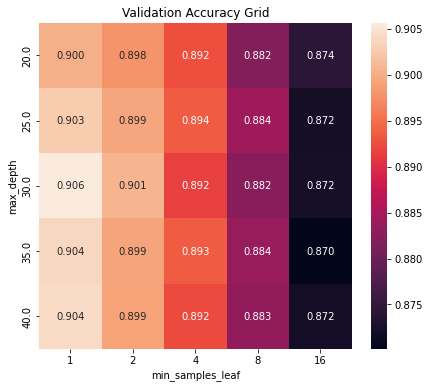

#### Testing Performance

truth\pred,0,1
0,3177,192
1,46,183


,value
Accuracy,0.933852
Precision,0.488000
Recall,0.799127


In [16]:
display(Markdown(f'#### Training Performance'))
param_md = np.linspace(20.0, 40.0, 5)
param_msl = [2**x for x in range(0, 5)]
param_grid = ParameterGrid({
    'max_depth': param_md,
    'min_samples_leaf': param_msl
})
best_param_rfc, acc_history = train_model('RFC', param_grid, X_train, y_train)
acc_grid = np.array(acc_history).reshape((5, 5))
show_acc_grid(acc_grid, (7, 6), 'min_samples_leaf', 'max_depth', param_msl, param_md)

display(Markdown(f'#### Testing Performance'))
y_pred = best_param_rfc.predict(X_test)
_ = show_performance(y_test, y_pred)

### SVM

#### Training Performance

{'C': 220.0, 'gamma': 8.0}

truth\pred,0,1
0,6012,1081
1,352,6741


,value
Accuracy,0.898985
Precision,0.861800
Recall,0.950374


{'C': 220.0, 'gamma': 9.0}

truth\pred,0,1
0,6044,1049
1,355,6738


,value
Accuracy,0.901029
Precision,0.865288
Recall,0.949951


{'C': 220.0, 'gamma': 10.0}

truth\pred,0,1
0,6050,1043
1,373,6720


,value
Accuracy,0.900183
Precision,0.865645
Recall,0.947413


{'C': 220.0, 'gamma': 11.0}

truth\pred,0,1
0,6040,1053
1,378,6715


,value
Accuracy,0.899126
Precision,0.864444
Recall,0.946708


{'C': 220.0, 'gamma': 12.0}

truth\pred,0,1
0,6042,1051
1,407,6686


,value
Accuracy,0.897223
Precision,0.864159
Recall,0.942619


{'C': 230.0, 'gamma': 8.0}

truth\pred,0,1
0,6013,1080
1,350,6743


,value
Accuracy,0.899196
Precision,0.861946
Recall,0.950656


{'C': 230.0, 'gamma': 9.0}

truth\pred,0,1
0,6050,1043
1,353,6740


,value
Accuracy,0.901593
Precision,0.865990
Recall,0.950233


{'C': 230.0, 'gamma': 10.0}

truth\pred,0,1
0,6048,1045
1,378,6715


,value
Accuracy,0.899690
Precision,0.865335
Recall,0.946708


{'C': 230.0, 'gamma': 11.0}

truth\pred,0,1
0,6037,1056
1,387,6706


,value
Accuracy,0.898280
Precision,0.863953
Recall,0.945439


{'C': 230.0, 'gamma': 12.0}

truth\pred,0,1
0,6042,1051
1,406,6687


,value
Accuracy,0.897293
Precision,0.864177
Recall,0.942760


{'C': 240.0, 'gamma': 8.0}

truth\pred,0,1
0,6019,1074
1,352,6741


,value
Accuracy,0.899478
Precision,0.862572
Recall,0.950374


{'C': 240.0, 'gamma': 9.0}

truth\pred,0,1
0,6055,1038
1,355,6738


,value
Accuracy,0.901805
Precision,0.866512
Recall,0.949951


{'C': 240.0, 'gamma': 10.0}

truth\pred,0,1
0,6043,1050
1,380,6713


,value
Accuracy,0.899196
Precision,0.864743
Recall,0.946426


{'C': 240.0, 'gamma': 11.0}

truth\pred,0,1
0,6040,1053
1,394,6699


,value
Accuracy,0.897998
Precision,0.864164
Recall,0.944452


{'C': 240.0, 'gamma': 12.0}

truth\pred,0,1
0,6042,1051
1,408,6685


,value
Accuracy,0.897152
Precision,0.864142
Recall,0.942478


{'C': 250.0, 'gamma': 8.0}

truth\pred,0,1
0,6021,1072
1,356,6737


,value
Accuracy,0.899337
Precision,0.862722
Recall,0.949810


{'C': 250.0, 'gamma': 9.0}

truth\pred,0,1
0,6060,1033
1,356,6737


,value
Accuracy,0.902087
Precision,0.867053
Recall,0.949810


{'C': 250.0, 'gamma': 10.0}

truth\pred,0,1
0,6045,1048
1,377,6716


,value
Accuracy,0.899549
Precision,0.865018
Recall,0.946849


{'C': 250.0, 'gamma': 11.0}

truth\pred,0,1
0,6037,1056
1,399,6694


,value
Accuracy,0.897434
Precision,0.863742
Recall,0.943747


{'C': 250.0, 'gamma': 12.0}

truth\pred,0,1
0,6037,1056
1,405,6688


,value
Accuracy,0.897011
Precision,0.863636
Recall,0.942901


{'C': 260.0, 'gamma': 8.0}

truth\pred,0,1
0,6027,1066
1,358,6735


,value
Accuracy,0.899619
Precision,0.863351
Recall,0.949528


{'C': 260.0, 'gamma': 9.0}

truth\pred,0,1
0,6057,1036
1,358,6735


,value
Accuracy,0.901734
Precision,0.866684
Recall,0.949528


{'C': 260.0, 'gamma': 10.0}

truth\pred,0,1
0,6044,1049
1,378,6715


,value
Accuracy,0.899408
Precision,0.864889
Recall,0.946708


{'C': 260.0, 'gamma': 11.0}

truth\pred,0,1
0,6039,1054
1,400,6693


,value
Accuracy,0.897505
Precision,0.863947
Recall,0.943606


{'C': 260.0, 'gamma': 12.0}

truth\pred,0,1
0,6035,1058
1,407,6686


,value
Accuracy,0.896729
Precision,0.863378
Recall,0.942619


Best Param: {'C': 250.0, 'gamma': 9.0}

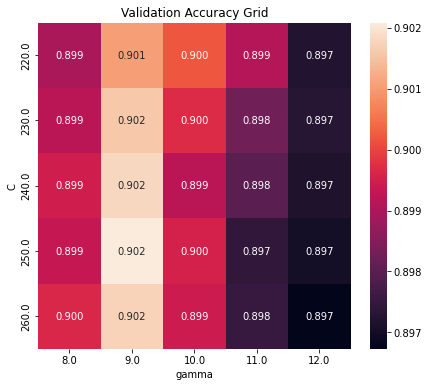

#### Testing Performance

truth\pred,0,1
0,2954,415
1,123,106


,value
Accuracy,0.850472
Precision,0.203455
Recall,0.462882


In [17]:
display(Markdown(f'#### Training Performance'))
param_C = np.linspace(220.0, 260.0, 5)
param_gamma = np.linspace(8.0, 12.0, 5)
param_grid = ParameterGrid({
    'C': param_C,
    'gamma': param_gamma
})
best_param_svc, acc_history = train_model('SVC', param_grid, X_train, y_train)        
acc_grid = np.array(acc_history).reshape((5, 5))
show_acc_grid(acc_grid, (7, 6), 'gamma', 'C', param_gamma, param_C)

display(Markdown(f'#### Testing Performance'))
y_pred = best_param_svc.predict(X_test)
_ = show_performance(y_test, y_pred)

### Logistic Regression

#### Training Performance

{'C': 600.0}

truth\pred,0,1
0,4541,2552
1,3006,4087


,value
Accuracy,0.608205
Precision,0.615605
Recall,0.576202


{'C': 650.0}

truth\pred,0,1
0,4542,2551
1,3004,4089


,value
Accuracy,0.608417
Precision,0.615813
Recall,0.576484


{'C': 700.0}

truth\pred,0,1
0,4542,2551
1,3003,4090


,value
Accuracy,0.608487
Precision,0.615871
Recall,0.576625


{'C': 750.0}

truth\pred,0,1
0,4539,2554
1,3002,4091


,value
Accuracy,0.608346
Precision,0.615651
Recall,0.576766


{'C': 800.0}

truth\pred,0,1
0,4541,2552
1,3002,4091


,value
Accuracy,0.608487
Precision,0.615836
Recall,0.576766


Best Param: {'C': 700.0}

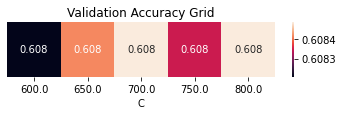

#### Testing Performance

truth\pred,0,1
0,2894,475
1,129,100


,value
Accuracy,0.832129
Precision,0.173913
Recall,0.436681


In [18]:
display(Markdown(f'#### Training Performance'))
param_C = np.linspace(600, 800, 5)
param_grid = ParameterGrid({
    'C': param_C
})
best_param_lrc, acc_history = train_model('LRC', param_grid, X_train, y_train)
acc_grid = np.array(acc_history).reshape((1, 5))
show_acc_grid(acc_grid, (6, 1), 'C', '', param_C, False)
    
display(Markdown(f'#### Testing Performance'))
y_pred = best_param_lrc.predict(X_test)
_ = show_performance(y_test, y_pred)